![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 003 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 28/05/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0003Part002.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml, load_breast_cancer, load_digits, load_iris, load_wine

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

T_MNIST_IMG_SIZE = (28, 28)

TOTAL_RUN_TIME = 30 #<! Don't touch it!


In [4]:
# Auxiliary Functions

def BalancedSubSample( dfX: pd.DataFrame, colName: str, numSamples: int ):
    
    # TODO: Validate the number of samples
    # TODO: Validate the column name (Existence and categorical values)
    return dfX.groupby(colName, as_index = False, group_keys = False).apply(lambda dfS: dfS.sample(numSamples, replace = False))

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [5]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 30 [Sec]


## Team Members

 - `<FULL>_<NAME>_<ID001>`.
 - `<FULL>_<NAME>_<ID002>`.

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

In [6]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook



## Generate / Load Data

In [7]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 3. PCA

### 3.1. PCA Algorithm

In this section we'll implement a SciKit Learn API compatible class for the PCA.  
The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set builds the encoder / decoder.  
3. `transform()` - Applies the encoding on the input data.  
4. `inverse_transform()` - Applies the decoding on the input data.  

* <font color='brown'>(**#**)</font> You may use the [SciKit Learn's PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as a reference.
* <font color='brown'>(**#**)</font> Both encoding and decoding applied as out of sample encoding / decoding.
* <font color='brown'>(**#**)</font> Pay attention to data structure (`N x D`).


In [8]:
from scipy.sparse.linalg import eigsh

class PCA:
    def __init__(self, d: int = 2):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.mUd = None
        self.vMean = None
        #===============================================================#
        
    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.
        # 2. Build the model decoder.
        # 3. Optimize calculation by the dimensions of `mX`.
        # !! You may find `scipy.sparse.linalg.svds()` useful.
        # !! You may find `scipy.sparse.linalg.eigsh()` useful.

        self.vMean = mX.mean(0)
        mCov = np.cov(mX.T)
        _, mUd = eigsh(mCov, k=self.d)
        self.mUd = mUd[:, ::-1]
        #===============================================================# 
        
        return self
    
    def transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding
        Args:
            mX - Input data with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.
        # return (mX - np.atleast_1d(self.vMean)) @ self.mUd
        
        mZ = (mX - np.atleast_2d(self.vMean)) @ self.mUd
        #===============================================================#

        return mZ
    
    def inverse_transform(self, mZ: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) decoding
        Args:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        Output:
            mX - Reconstructed data with shape N x D.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model decoder.
        # return (mZ @ self.mUd.T) + np.atleast_1d(self.vMean)
        
        mX = (mZ @ self.mUd.T) + np.atleast_2d(self.vMean)
        #===============================================================#

        return mX


* <font color='red'>(**?**)</font> In the class we use _out of sample_ encoding / decoding. What if we use the same `mX` for training and the encoding?  
Make sure to understand this before proceeding.

### 3.2. PCA Application

In this section the PCA (Using the above class) will be applied on several data sets:

 * Breast Cancer Dataset - Loaded using `load_breast_cancer()`.
 * Digits Dataset - Loaded using `load_digits()`.
 * Iris Dataset - Loaded using `load_iris()`.
 * Wine Dataset - Loaded using `load_wine()`.

For each data set:

1. Make yourself familiar with the data set:
    * How many features are there ($D$).
    * How many samples are there ($N$).
    * Do all features have the same unit?
2. Apply a Pre Process Step  
   In ML, usually, if the features do not have the same unit they are normalized.  
   Namely, make each feature with zero mean and unit standard deviation.   
   Write a function to normalize input data.
3. Apply the PCA  
   Set `d` to be visualization friendly and apply PCA from $D$ to $d$.  
   The obtained the low dimensional data represents $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$.
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to the data labels.  
   For each data set show result with the normalization step and without it.
5. Calculate Lost Energy  
   For each plot, show the value of ${\left\| \tilde{\boldsymbol{X}} - \boldsymbol{X} \right\|}_{F}^{2}$.  
   Do this by applying `inverse_transform()` on the low dimensional data and calculate the norm.


* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be plots figures for each data set. Show them in a single figure using sub plots.

In [9]:
#===========================Fill This===========================#
# 1. Implement the normalization function.
# !! Make sure to address the remark.

def NormalizeData(mX: np.ndarray) -> np.ndarray:
    '''
    Normalize data so each feature has zero mean and unit standard deviation.
    Args:
        mX  - Input data with shape N x d.
    Output:
        mY  - Output data with shape N x d.
    Remarks:
        - Features with zero standard deviation are not scaled (Only centered).
    '''

    mx_std = mX.std(0)
    mx_std[mx_std == 0] = 1
    mY = (mX - mX.mean(0)) / mx_std
    return mY
#===============================================================#

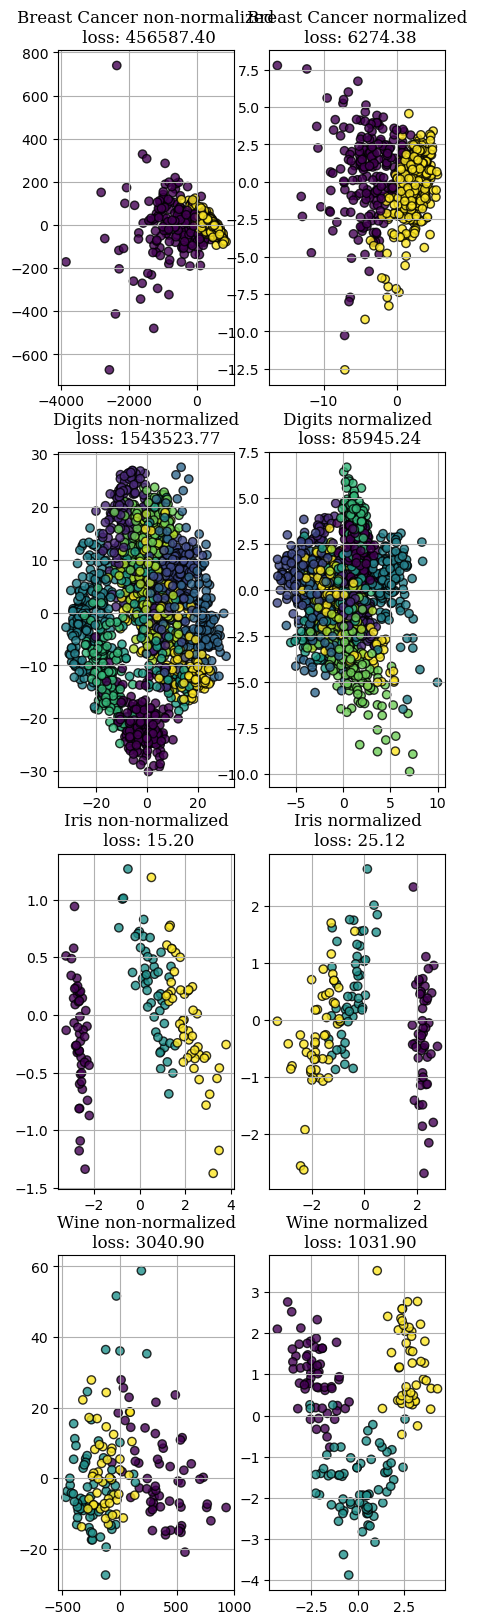

In [10]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Load each data set.
# 3. Apply PCA to each data set with and without normalization.
# 4. Display results as scatter data.
# !! The figure should be 2 x numDataSets.

from sklearn.datasets import load_breast_cancer, load_digits, load_iris, load_wine

def ax_plot(ax, mX, vY, title):
    pca = PCA(d=D)
    pca.fit(mX)
    mZ = pca.transform(mX)
    ax.scatter(mZ[:,0], mZ[:,1], c=vY, edgecolors='k', alpha=0.8)
    ax.grid()
    loss = np.linalg.norm(mX - pca.inverse_transform(mZ)) ** 2
    ax.set_title(f"{title}\n loss: {loss:.2f}", font='serif', fontsize=12)

D = 2 # number of dimensions
datasets = [load_breast_cancer, load_digits, load_iris, load_wine]
dataset_names = ['Breast Cancer', 'Digits', 'Iris', 'Wine']
num_datasets = len(datasets)
fig, _ = plt.subplots(num_datasets, 2, figsize=(5, 20))

for i in range(num_datasets):
    mX, vY = datasets[i](return_X_y=True)
    # plot non normalized

    ax_plot(fig.axes[2*i], mX, vY, dataset_names[i] + ' non-normalized')
    # plot normalized
    ax_plot(fig.axes[2*i+1], NormalizeData(mX), vY, dataset_names[i] + ' normalized')
#===============================================================#

### 3.3. Question

In the above, why does the results of the normalized and non normalized data are different?  
Address the geometry of the results and the value of the reconstruction error.

### 3.3. Solution

Geometry of the Results:

PCA seeks the directions of maximum variance in the data. When the features have significantly different scales or units, their variances can dominate the principal components. Normalizing the features ensures that they have a similar scale, aiding PCA in capturing the underlying structure more accurately.

Reconstruction Error:

In the absence of normalization, features with larger variances contribute more to the reconstruction error. This can lead to a distorted representation of the data, as PCA prioritizes capturing the variance of these dominant features. Normalization addresses this issue by ensuring that all features contribute more equally to the reconstruction error, resulting in a more balanced representation of the data.

---

## 4. Image Denoising

In this section the PCA algorithm will be used for denoising images from the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database).  
In this section:

 1. Load Data  
    Load the MNIST data set and sub sample it.  
    We'll have a perfectly balanced data set.
    The data will be in `mX` and labels in `vY`.  
    This is already implemented.
 2. Add Noise  
    We'll add noise to the data.  
    The noise of the data will be modeled as a Poisson Noise (Also known as [_Shot Noise_](https://en.wikipedia.org/wiki/Shot_noise)).  
    The _Shot Noise_ is a classic model of noise gathered by imaging sensors.  
    This is already implemented.
 3. Analyze the Data  
    Analyze the spectrum of the data and choose an appropriate ste of parameters for denoising.
 3. Apply Denoising  
    Apply denoising by utilizing the PCA algorithm.
 4. Analyze Result  
    Show the results as a function of the parameters.

In [11]:
# Parameters
numSamplesClass = 600
λ               = 35

In [12]:
# Load Data
# If you get SSL error, uncomment the following 2 lines
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
dfX, dfY = fetch_openml(name = 'mnist_784', version = 1, return_X_y = True, as_frame = True, parser = 'auto')


In [13]:
# Sub Sample Data
dfData = pd.concat((dfX, dfY), axis = 1)

# Balanced Sub Sample
# End Result: 'numSamplesClass' samples per digit
dfData = BalancedSubSample(dfData, 'class', numSamplesClass)
vY = dfData['class'].to_numpy(dtype = np.uint8)
mX = dfData.drop(columns = ['class']).to_numpy()

In [14]:
# Add Poisson Noise
mN = np.random.poisson(λ, size = mX.shape) #<! Noise samples

In [15]:
# Add Noise
# Make sure values are in {0, 1, 2, ..., 255} range
mXRef = mX.copy() #<! Reference with no noise
mXRef = mXRef / 255

mX += mN
mX = np.minimum(mX, 255)


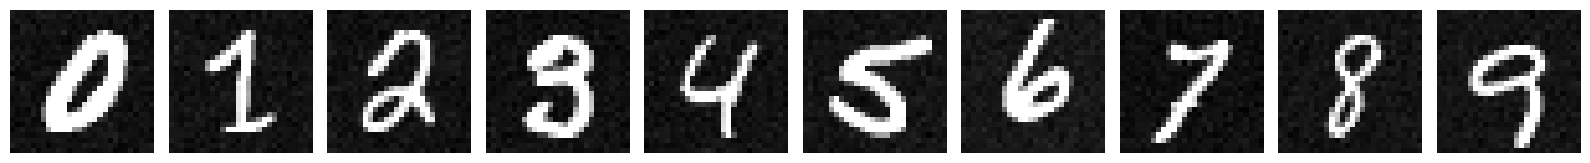

In [16]:
# Show Samples

lIdx = [np.flatnonzero(vY == ii)[0] for ii in range(10)]

_, mHA = plt.subplots(1, 10, figsize = (16, 4))
for ii, hA in enumerate(mHA.flat):
    idx = lIdx[ii]
    mI  = np.reshape(mX[idx], T_MNIST_IMG_SIZE)
    # mI  = np.clip(mI, 0, 1)
    hA.imshow(mI, cmap = 'gray')
    hA.axis('off')
    
plt.tight_layout()
plt.show()

### 4.1. The Data Spectrum

In this section:

 1. Pre Process the data (Optional).  
    Do this step if you think it is needed.
 2. Plot the Spectrum of the Eigen Values of the data.
 3. Choose **a range** (5 values) of `d` for the low dimensionality reduction.
 4. For each `d` value, calculate the **relative energy loss**.


In [17]:
#===========================Fill This===========================#
# 1. Pre Process Data (Optional).
# !! Make sure to keep the name of the data `mX`.
# !! Don't change the order of the data so it matches `vY`.

mX = NormalizeData(mX)

#===============================================================#

In [18]:
#===========================Fill This===========================#
# 1. Calculate the spectrum of the Eigen Values of the data.

Ex = mX @ mX.T
eigen_values = np.linalg.eigvalsh(Ex)[::-1]
eigen_values_normalized = 1/ np.trace(Ex) * eigen_values

#===============================================================#

Text(0, 0.5, 'Value')

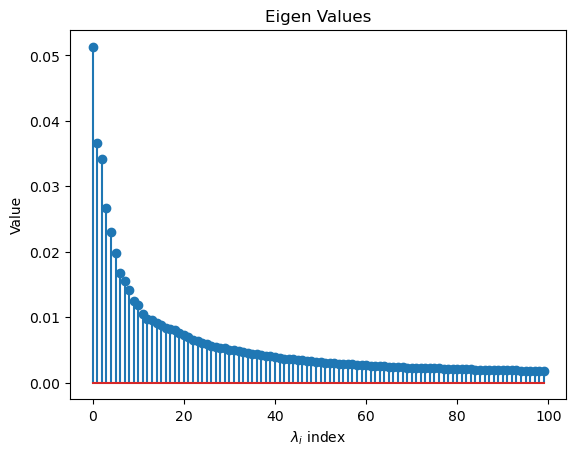

In [19]:
#===========================Fill This===========================#
# 1. Display the Spectrum.
# !! You may show both the spectrum and the relative energy.

plt.stem(eigen_values_normalized[:100])
plt.title('Eigen Values')
plt.xlabel('$\lambda_i$ index')
plt.ylabel('Value')

#===============================================================#

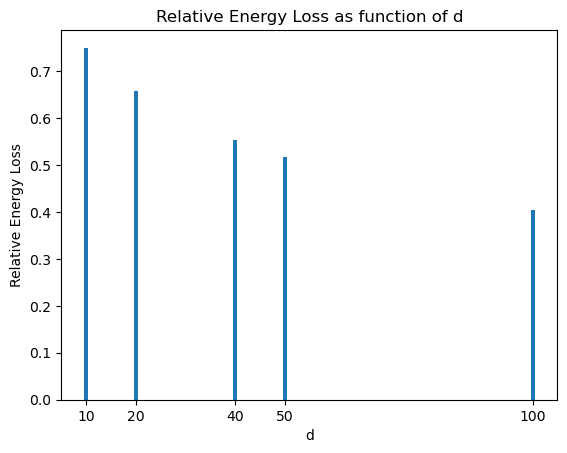

In [20]:
#===========================Fill This===========================#
# 1. Choose a range of `d` values.
# 2. Per `d` plot / display the relative energy loss.
# !! Don't choose too many, keep running time and visualization reasonable.
# !! The choice should be in order to show the effect of `d` on the results and not only the optimal `d`.

d_range = [10, 20, 40, 50, 100]
relative_energy_losses = [np.sum(eigen_values_normalized[d:]) for d in d_range]
plt.bar(d_range, relative_energy_losses)
plt.title('Relative Energy Loss as function of d')
plt.xlabel('d')
plt.xticks(d_range)
plt.ylabel('Relative Energy Loss')
plt.show()

#===============================================================#

### 4.2. PCA Based Denoising

In this section, per `d` value:

 1. Build the _Encoder_ and _Decoder_. 
 2. Denoise the images listed in the index list `lIdx`.
 3. Show results per `d`
      * For each image show the reconstruction error vs. the noisy sample (`mX`).
      * For each image show the estimation error vs. the non noisy sample (`mXRef`).

* <font color='brown'>(**#**)</font> Make sure when you use the whole data (`mX`) and when the sub set to analyze.
* <font color='brown'>(**#**)</font> For the PCA you may only use `mX`.
* <font color='brown'>(**#**)</font> The output should be the 10 images per row where the number of rows is the number of `d` values + 2 (For the reference / noisy images).

In [21]:
#===========================Fill This===========================#
# 1. Build the encoder / decoder using the `PCA` class above.
# 2. Per `d` denoise the images in `lIdx`.
# !! Only use `mX` for the PCA step.

def encode_decode(mx, d):
    pca = PCA(d)
    pca.fit(mx)
    mZ = pca.transform(mx)
    return pca.inverse_transform(mZ)
    


#===============================================================#

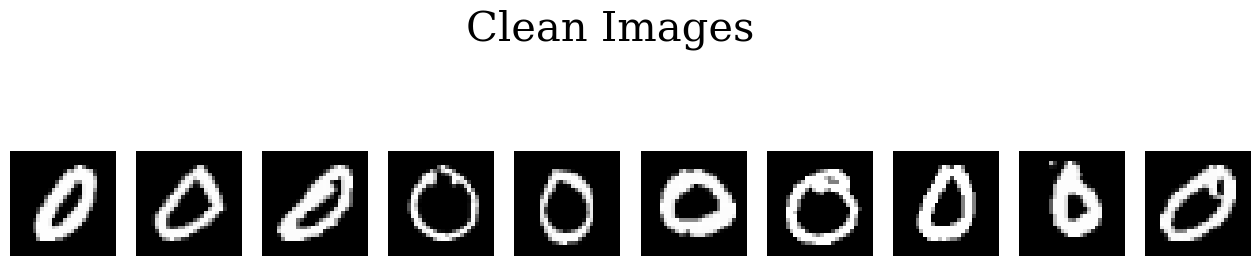

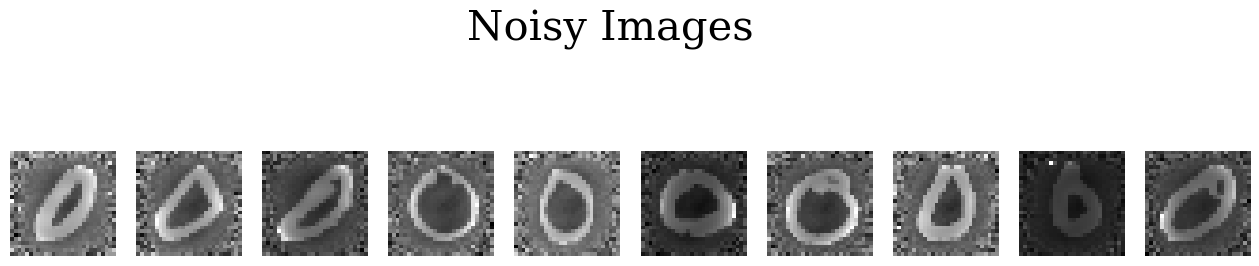

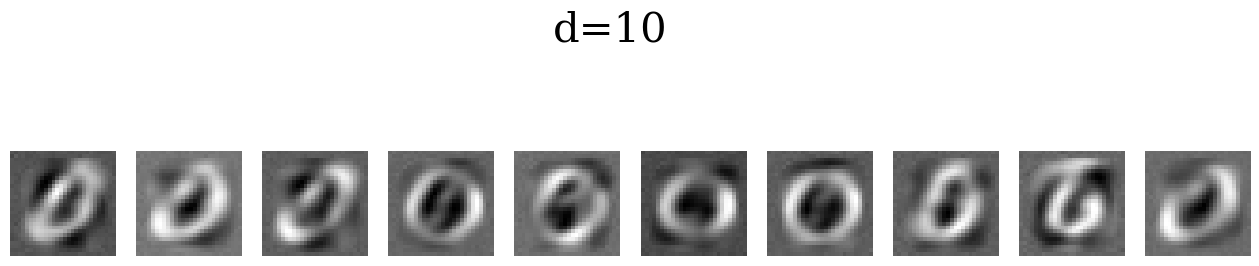

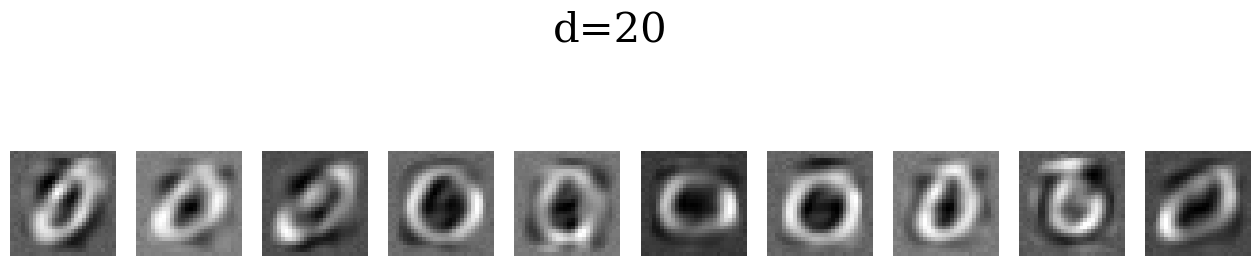

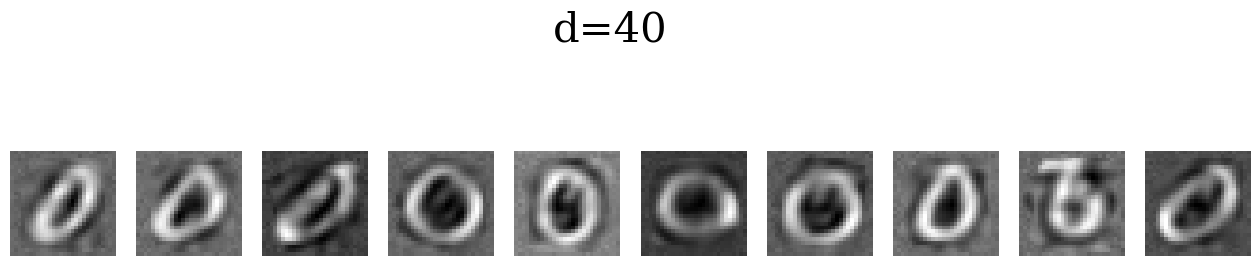

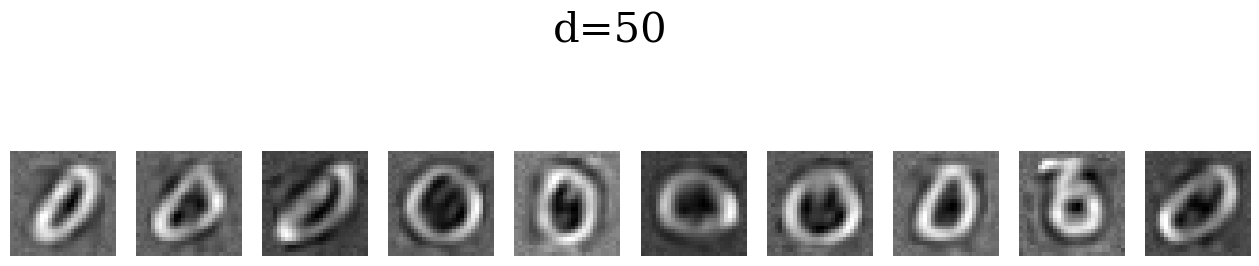

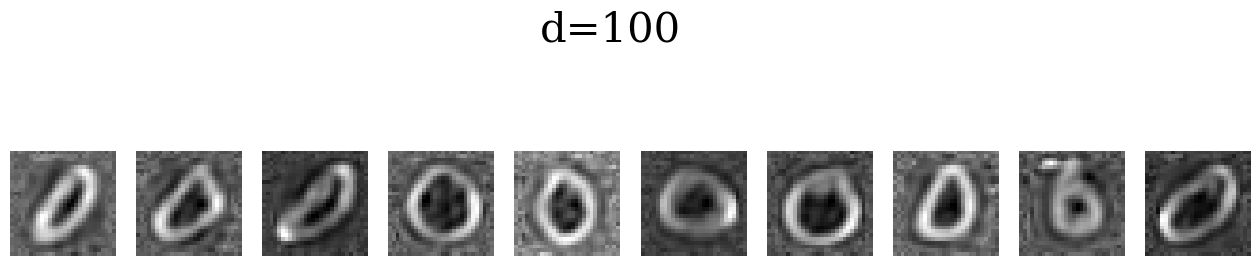

In [22]:
#===========================Fill This===========================#
# 1. Create a subplot of `len(d) + 2 x 10` plots.
# 2. In the 1st row, show the clean images (`mXRef`).
# 3. In the 2nd row, show the noisy images (`mX`).
# 4. In the next rows show the sample per different `d`.  
#    Per row, show `d`.

def plot_row(mx_in, title):
    fig, axes = plt.subplots(1, 10, figsize=(16, 4))
    fig.suptitle(title, font='serif', fontsize=30)
    
    for idx, ax in enumerate(axes.flat):
        image = np.reshape(mx_in[idx], T_MNIST_IMG_SIZE)
        ax.imshow(image, cmap='gray')
        ax.axis('off')

# Create a list of indices for each digit (0 to 9)
digit_indices = [np.flatnonzero(vY == digit)[0] for digit in range(10)]

# Plot clean images
plot_row(mXRef, 'Clean Images')

# Plot noisy images
plot_row(mX, 'Noisy Images')

# Plot samples per different d
for d in d_range:
    plot_row(encode_decode(mX, d), f'd={d}')

plt.show()

#===============================================================#

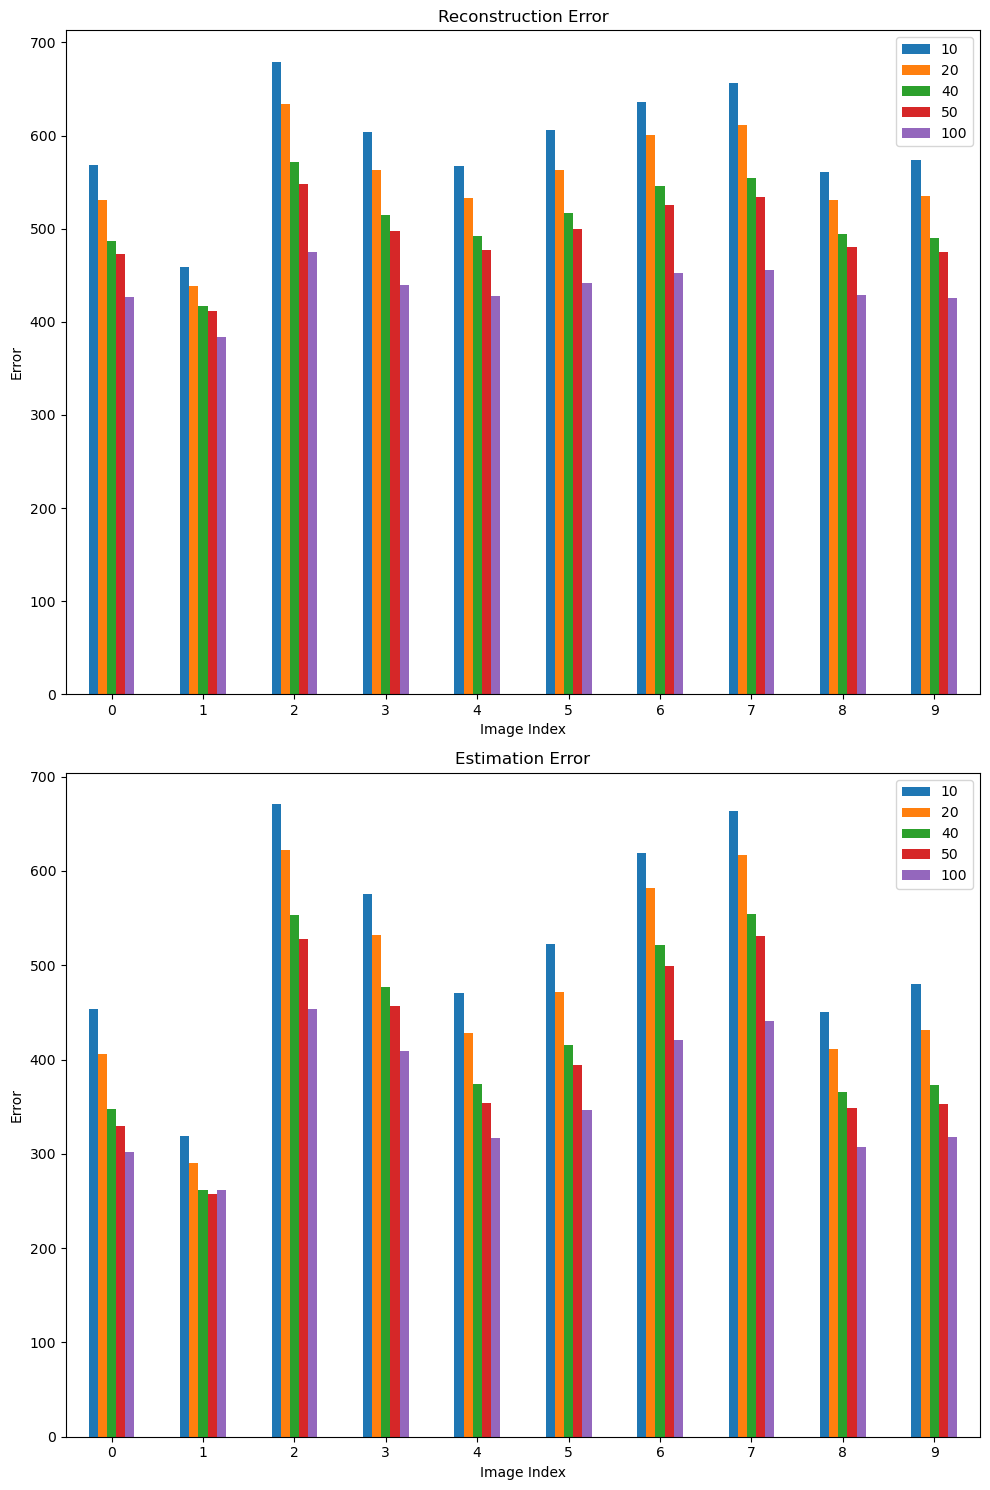

In [23]:
#===========================Fill This===========================#
# 1. Create 2 sub plots where the `x` is the image index {0, 1, ..., 9}.
# 2. The 1st plot, per `d`, shows the reconstruction error.
# 3. The 2nd plot, per `d`, shows the estimation error.

def get_error(mx_in, mx_ref, num):
    return np.linalg.norm(mx_in[vY == num, :].flatten() - mx_ref[vY == num, :].flatten())

# Data
normalized_ref = NormalizeData(mXRef)
post_pca_mats = [encode_decode(mX, d) for d in d_range]

# Calculate reconstruction errors and estimation errors
rec_errors = [[get_error(post_pca_mats[j], mX, i) for j in range(len(d_range))] for i in range(10)]
est_errors = [[get_error(post_pca_mats[j], normalized_ref, i) for j in range(len(d_range))] for i in range(10)]

# Plotting
def plot_errors(rec_error, est_error):
    fig, axes = plt.subplots(2, 1, figsize=(10, 15))
    
    rec_error_df = pd.DataFrame(rec_error, columns=d_range)
    rec_error_df.plot.bar(ax=axes[0], rot=0)
    
    est_error_df = pd.DataFrame(est_error, columns=d_range)
    est_error_df.plot.bar(ax=axes[1], rot=0)
    
    axes[0].set_title('Reconstruction Error')
    axes[1].set_title('Estimation Error')
    axes[0].set_ylabel('Error')
    axes[1].set_ylabel('Error')
    axes[1].set_xlabel('Image Index')
    axes[0].set_xlabel('Image Index')
    
    plt.tight_layout()
    plt.show()

plot_errors(rec_errors, est_errors)

#===============================================================#

### 4.3. Question

Address the following remarks:

 - How does the noise model effect the performance of the denoising?  
   Specifically, if the noise model was Gaussian with the same variance, what would change?
 - Would you use the reconstruction error as an estimation of the estimation error?  
   Answer in general and specifically for Images.
 - Explain the idea behind the PCA denoising.  
   Specifically address the trade off between small and large values of `d`.
 - If the data was 1D (Audio instead of Image), would you expect it to perform better?  
   Think if the model has any knowledge about the data being 2D.

### 4.3. Solution

Effect of Noise Model: If the noise model were Gaussian with the same variance, the performance of PCA denoising would likely improve. PCA assumes that the data follows a Gaussian distribution, so if the noise also follows a Gaussian distribution with the same variance, it aligns better with PCA's assumptions.

Reconstruction Error vs. Estimation Error: The reconstruction error is not a reliable estimation of the estimation error. The relationship between them is not linear and hard to predict. As we increase the d in PCA denoising, the reconstruction error decreases, but the estimation error depends on how effectively noise is removed, which can vary with d inversely.

PCA Denoising Idea: PCA denoising aims to reduce data dimensionality and then reconstruct it from the reduced dimensions. The trade-off with d is that smaller values of d may lead to information loss, while larger values of d increase computational complexity.

1D Data vs. 2D Data: PCA denoising performance may not significantly differ between 1D and 2D data if the model has no prior knowledge about the data's structure. The key factor is whether PCA captures the relevant features and structure of the data, irrespective of its dimensionality.

---

### 4.4. PCA Denoising with Labels

In the above we used no knowledge on the label of the image.  
In this section you should use the labels information in order to improve results.

 1. Write a code which take advantage of the labels `vY` (Be creative).
 2. Show the plots of the reconstruction and estimation error.
 3. Explain, in words, your idea.
 4. Explain, in words, the results.

In [24]:
#===========================Fill This===========================#
# 1. Choose the maximum `d` used in the previous section.
# 2. Apply PCA Denoising on the list of images.

MAX_D = d_range[-1]
def create_num_pca_model(i):
    pca = PCA(d=MAX_D)
    pca.fit(mX[vY == i , :])
    return pca


pca_models = {i: create_num_pca_model(i) for i in range(10)}
mx_sup_pca = mX.copy()
for num_sample in range(mX.shape[0]):
    encoded_sample = pca_models[vY[num_sample]].transform(mx_sup_pca[num_sample, :].reshape(1, -1))
    mx_sup_pca[num_sample, :] = pca_models[vY[num_sample]].inverse_transform(encoded_sample)


rec_errors = [get_error(mx_sup_pca, mX, i)  for i in range(10)]

est_errors = [get_error(mx_sup_pca, normalized_ref, i)  for i in range(10)]

#===============================================================#

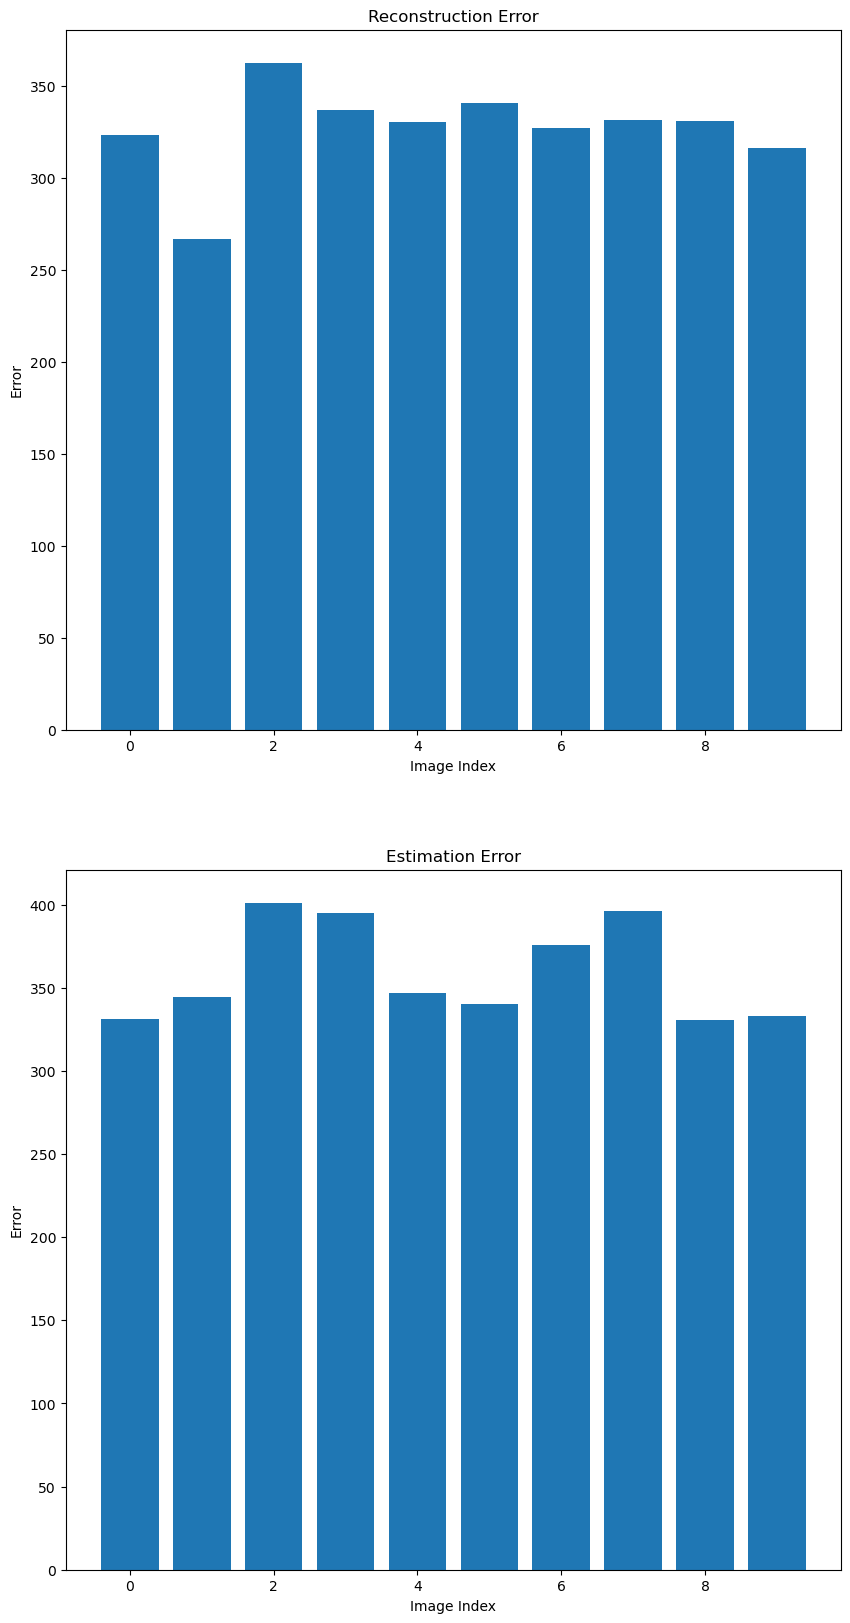

In [25]:
#===========================Fill This===========================#
# 1. Display the reconstruction and estimation error per image.
# 2. Compare to the previous result for the same `d`.

axes = plt.subplots(2, 1, figsize=(10, 20))[1]
axes[0].bar(range(10), rec_errors)
axes[1].bar(range(10), est_errors)
axes[0].set_title('Reconstruction Error')
axes[1].set_title('Estimation Error')
axes[0].set_ylabel('Error')
axes[1].set_ylabel('Error')
axes[1].set_xlabel('Image Index')
axes[0].set_xlabel('Image Index')
plt.show()

#===============================================================#

### 4.4.3. Solution

The concept here is to utilize labels to identify the closest image to the clean images. In essence, we aim to construct an encoder that captures the genuine data structure while filtering out noise. To achieve this, we follow these steps:

Fit a PCA (Principal Component Analysis) model for each numerical label. This allows us to understand the underlying structure of the data associated with each digit.

For each noisy image, apply the PCA model that corresponds to its label. This encoding and decoding process helps generate an image that closely resembles the clean image, effectively removing the noise and preserving the true data structure.

---

### 4.4.4. Solution

As anticipated, employing labels to tailor the PCA models yields superior outcomes. Both the reconstruction error and estimation error are significantly reduced. While there are instances where a generalized model may be preferable to mitigate overfitting, in scenarios like image denoising, especially with a sufficient number of samples, it proves advantageous to construct a distinct model for each label. This approach enables us to capture the authentic structure of each numeral more accurately, leading to enhanced denoising results.

---

In [26]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 13.553746700286865 [Sec].
